## 1. Import Libraries and Load the Dataset

In [90]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, mean_squared_error

# Load the dataset
df = pd.read_csv("covid_19_clean_complete.csv")

# Display the first few rows
df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


## 2. Data Cleaning
Handling Missing Values:

In [91]:
# Check data types and missing values
df.info()
print("Missing values per column:\n", df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  14664 non-null  object 
 1   Country/Region  49068 non-null  object 
 2   Lat             49068 non-null  float64
 3   Long            49068 non-null  float64
 4   Date            49068 non-null  object 
 5   Confirmed       49068 non-null  int64  
 6   Deaths          49068 non-null  int64  
 7   Recovered       49068 non-null  int64  
 8   Active          49068 non-null  int64  
 9   WHO Region      49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB
Missing values per column:
 Province/State    34404
Country/Region        0
Lat                   0
Long                  0
Date                  0
Confirmed             0
Deaths                0
Recovered             0
Active                0
WHO Region            0
dtype: int64


In [92]:
df['Province/State'].value_counts()

Province/State
Australian Capital Territory    188
Yunnan                          188
Mayotte                         188
Guadeloupe                      188
French Polynesia                188
                               ... 
Guizhou                         188
Guangxi                         188
Guangdong                       188
Gansu                           188
Saint Pierre and Miquelon       188
Name: count, Length: 78, dtype: int64

In [93]:
df['Province/State'].isnull().sum()

34404

In [94]:
# Calculate the total number of rows in the DataFrame
total_rows = len(df)

# Calculate the number of missing values in 'Province/State'
missing_values = df['Province/State'].isnull().sum()

# Calculate the percentage of missing values
missing_percentage = (missing_values / total_rows) * 100

print(f"Missing Percentage in 'Province/State': {missing_percentage:.2f}%")

Missing Percentage in 'Province/State': 70.11%


In [95]:
df.drop(['Province/State'], axis=1, inplace=True)

Standardizing Date Format:

In [96]:
# Convert the Date column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Verify the changes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Country/Region  49068 non-null  object        
 1   Lat             49068 non-null  float64       
 2   Long            49068 non-null  float64       
 3   Date            49068 non-null  datetime64[ns]
 4   Confirmed       49068 non-null  int64         
 5   Deaths          49068 non-null  int64         
 6   Recovered       49068 non-null  int64         
 7   Active          49068 non-null  int64         
 8   WHO Region      49068 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(4), object(2)
memory usage: 3.4+ MB


## 3. Feature Engineering
Derive New Features:

In [98]:
# Calculate Mortality Rate
df['Mortality Rate'] = df['Deaths'] / df['Confirmed']

# Handle potential division by zero or missing values
df.loc[:, 'Mortality Rate'] = df['Mortality Rate'].fillna(0)

# Calculate Daily Growth Rate for Confirmed Cases
def safe_pct_change(series):
    pct_change = series.pct_change()
    pct_change = pct_change.fillna(0)
    pct_change = pct_change.replace([np.inf, -np.inf], 0)
    return pct_change

df['Daily Growth Rate'] = df.groupby('Country/Region')['Confirmed'].transform(safe_pct_change)

In [99]:
print(df.index)
print(df.groupby('Country/Region')['Confirmed'].groups)

RangeIndex(start=0, stop=49068, step=1)
{'Afghanistan': [0, 261, 522, 783, 1044, 1305, 1566, 1827, 2088, 2349, 2610, 2871, 3132, 3393, 3654, 3915, 4176, 4437, 4698, 4959, 5220, 5481, 5742, 6003, 6264, 6525, 6786, 7047, 7308, 7569, 7830, 8091, 8352, 8613, 8874, 9135, 9396, 9657, 9918, 10179, 10440, 10701, 10962, 11223, 11484, 11745, 12006, 12267, 12528, 12789, 13050, 13311, 13572, 13833, 14094, 14355, 14616, 14877, 15138, 15399, 15660, 15921, 16182, 16443, 16704, 16965, 17226, 17487, 17748, 18009, 18270, 18531, 18792, 19053, 19314, 19575, 19836, 20097, 20358, 20619, 20880, 21141, 21402, 21663, 21924, 22185, 22446, 22707, 22968, 23229, 23490, 23751, 24012, 24273, 24534, 24795, 25056, 25317, 25578, 25839, ...], 'Albania': [1, 262, 523, 784, 1045, 1306, 1567, 1828, 2089, 2350, 2611, 2872, 3133, 3394, 3655, 3916, 4177, 4438, 4699, 4960, 5221, 5482, 5743, 6004, 6265, 6526, 6787, 7048, 7309, 7570, 7831, 8092, 8353, 8614, 8875, 9136, 9397, 9658, 9919, 10180, 10441, 10702, 10963, 11224, 11485, 

In [100]:
df

,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region,Mortality Rate,Daily Growth Rate
0,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean,0.000000,0.000000
1,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe,0.000000,0.000000
2,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa,0.000000,0.000000
3,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe,0.000000,0.000000
4,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
49063,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa,0.016185,0.002317
49064,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean,0.285630,0.005949
49065,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa,0.019774,0.000000
49066,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe,0.008293,0.005979


## 4. Exploratory Data Analysis (EDA)
Case Trends Over Time:

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length

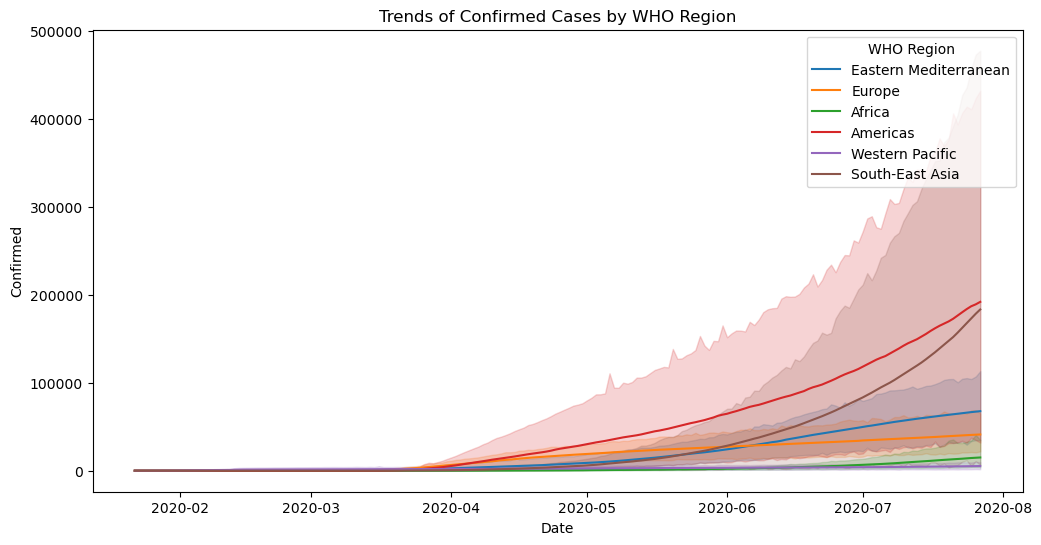

In [101]:
import matplotlib.pyplot as plt
import seaborn as sns

# Line plot for trends in confirmed cases, deaths, and recoveries
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Confirmed', hue='WHO Region', data=df)
plt.title('Trends of Confirmed Cases by WHO Region')
plt.xlabel('Date')
plt.ylabel('Confirmed')
plt.legend(title='WHO Region')
plt.show()

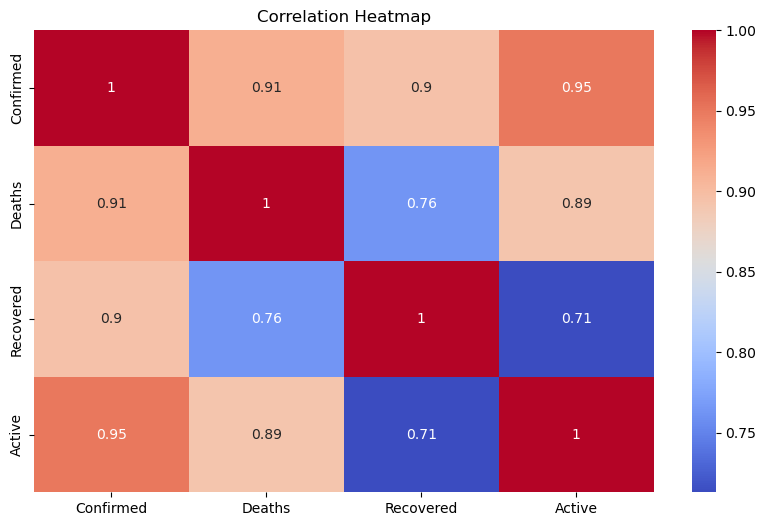

In [102]:
# Heatmap to analyze correlations
plt.figure(figsize=(10, 6))
sns.heatmap(df[['Confirmed', 'Deaths', 'Recovered', 'Active']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## 5. Predictive Modeling
Time-Series Forecasting:

In [103]:
# Normalize numerical features for modeling
from sklearn.preprocessing import MinMaxScaler

# List of columns to normalize
columns_to_normalize = ['Confirmed', 'Deaths', 'Recovered', 'Active']

# Initialize scaler
scaler = MinMaxScaler()

# Apply MinMaxScaler and update the DataFrame
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])

# Display the first few rows of the DataFrame to verify
print(df.head())

  Country/Region       Lat       Long       Date  Confirmed  Deaths  \
0    Afghanistan  33.93911  67.709953 2020-01-22        0.0     0.0   
1        Albania  41.15330  20.168300 2020-01-22        0.0     0.0   
2        Algeria  28.03390   1.659600 2020-01-22        0.0     0.0   
3        Andorra  42.50630   1.521800 2020-01-22        0.0     0.0   
4         Angola -11.20270  17.873900 2020-01-22        0.0     0.0   

   Recovered    Active             WHO Region  Mortality Rate  \
0        0.0  0.000005  Eastern Mediterranean             0.0   
1        0.0  0.000005                 Europe             0.0   
2        0.0  0.000005                 Africa             0.0   
3        0.0  0.000005                 Europe             0.0   
4        0.0  0.000005                 Africa             0.0   

   Daily Growth Rate  
0                0.0  
1                0.0  
2                0.0  
3                0.0  
4                0.0  


In [104]:
# Prepare data for time-series modeling
X = df[['Confirmed', 'Active', 'Mortality Rate']].values
y = df['Confirmed'].shift(-1).fillna(0).values  # Shift target for forecasting

# Split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Linear Regression model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)

RMSE: 0.029092423862434182


### Classification (e.g., Mortality Risk Prediction):

In [105]:
# Classify countries based on high or low mortality rate
df['High Mortality Risk'] = (df['Mortality Rate'] > 0.05).astype(int)

# Prepare data for classification
X = df[['Confirmed', 'Active', 'Daily Growth Rate']]
y = df['High Mortality Risk']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Evaluate classification performance
y_pred = clf.predict(X_test)
from sklearn.metrics import classification_report
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.98      0.96      8411
           1       0.86      0.63      0.73      1403

    accuracy                           0.93      9814
   macro avg       0.90      0.81      0.84      9814
weighted avg       0.93      0.93      0.93      9814



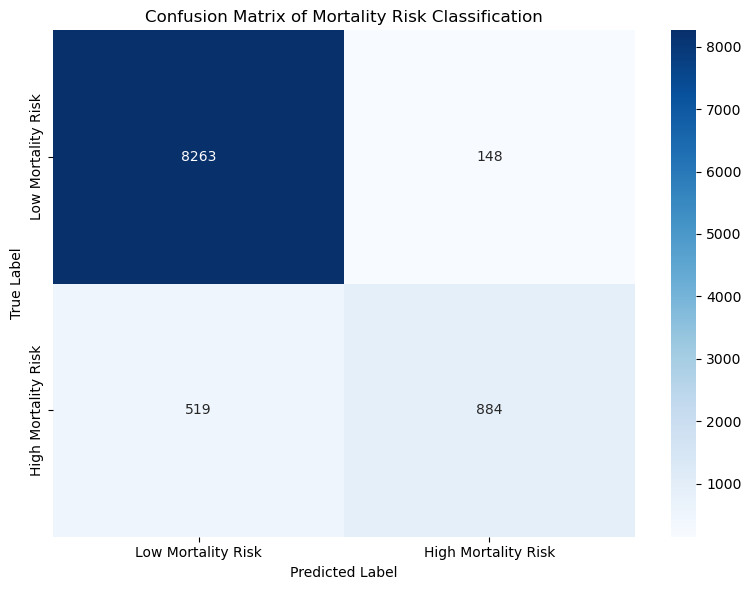

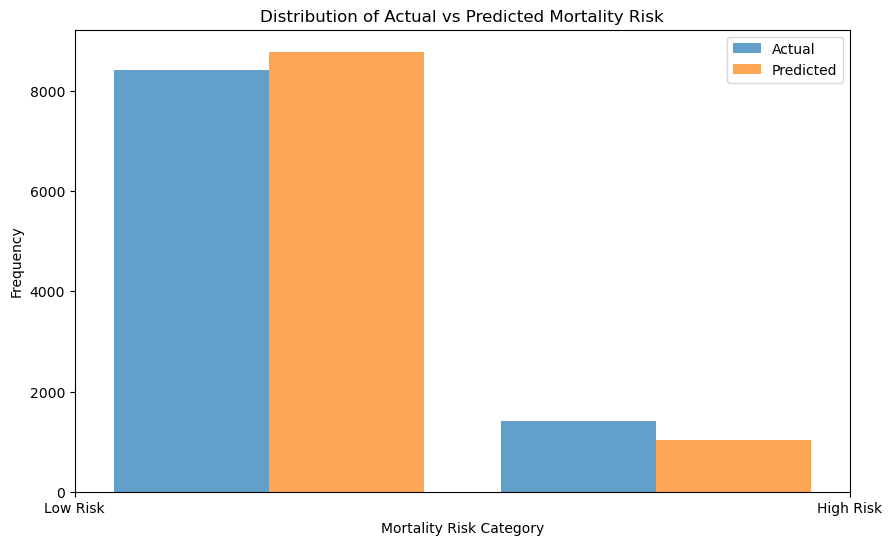

In [107]:
# Confusion Matrix Visualization
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Low Mortality Risk', 'High Mortality Risk'],
            yticklabels=['Low Mortality Risk', 'High Mortality Risk'])
plt.title('Confusion Matrix of Mortality Risk Classification')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()

# Alternatively, if you want to see the distribution of predictions
plt.figure(figsize=(10, 6))
plt.hist([y_test, y_pred], label=['Actual', 'Predicted'], alpha=0.7, bins=2)
plt.title('Distribution of Actual vs Predicted Mortality Risk')
plt.xlabel('Mortality Risk Category')
plt.ylabel('Frequency')
plt.xticks([0, 1], ['Low Risk', 'High Risk'])
plt.legend()
plt.show()

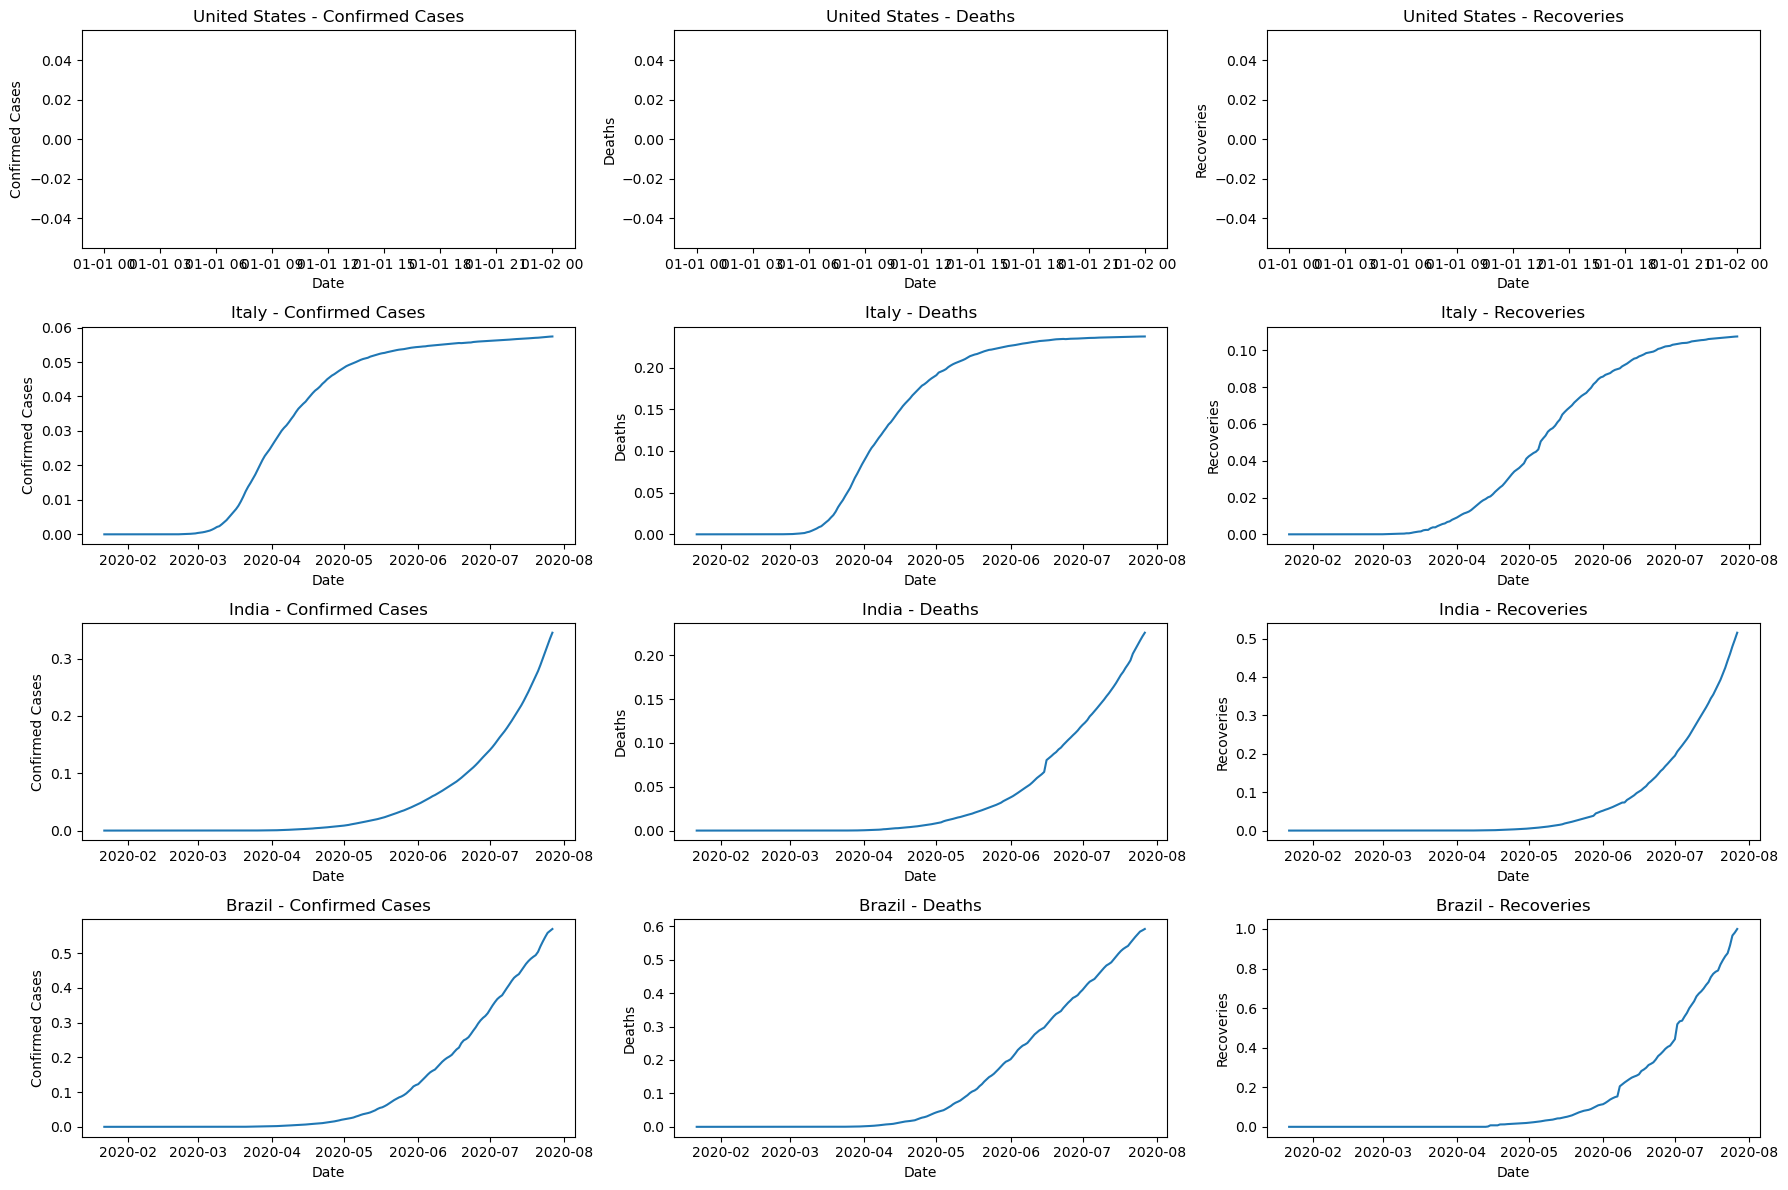

In [108]:
# Select a few countries to analyze
countries = ['United States', 'Italy', 'India', 'Brazil']

# Create a figure with subplots
fig, axes = plt.subplots(len(countries), 3, figsize=(18, 12))

# Iterate over the countries and plot the trends
for i, country in enumerate(countries):
    country_data = df[df['Country/Region'] == country]
    
    # Plot confirmed cases
    axes[i, 0].plot(country_data['Date'], country_data['Confirmed'])
    axes[i, 0].set_title(f"{country} - Confirmed Cases")
    axes[i, 0].set_xlabel('Date')
    axes[i, 0].set_ylabel('Confirmed Cases')
    
    # Plot deaths
    axes[i, 1].plot(country_data['Date'], country_data['Deaths'])
    axes[i, 1].set_title(f"{country} - Deaths")
    axes[i, 1].set_xlabel('Date')
    axes[i, 1].set_ylabel('Deaths')
    
    # Plot recoveries
    axes[i, 2].plot(country_data['Date'], country_data['Recovered'])
    axes[i, 2].set_title(f"{country} - Recoveries")
    axes[i, 2].set_xlabel('Date')
    axes[i, 2].set_ylabel('Recoveries')

plt.tight_layout()
plt.show()